# **Data Diri**

- Nama : Bagas Aqmal Febrianto
- Email : bagasaqmal70@gmail.com

# Import Library

In [1]:
!pip install langdetect

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

# Data Load

**Informasi Dataset**

Dataset ini merupakan dataset Course Udemy.

Link Dataset : https://www.kaggle.com/datasets/jilkothari/finance-accounting-courses-udemy-13k-course

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bagasaqmalfebrianto","key":"23dd9a6a0b31d5608075cfafbadbb321"}'}

In [4]:
!mkdir -p ~/.kaggle

# Pindahkan kaggle.json ke direktori .kaggle
!mv kaggle.json ~/.kaggle/

# Berikan izin ke file agar bisa digunakan
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jilkothari/finance-accounting-courses-udemy-13k-course
!unzip finance-accounting-courses-udemy-13k-course.zip

Dataset URL: https://www.kaggle.com/datasets/jilkothari/finance-accounting-courses-udemy-13k-course
License(s): CC0-1.0
finance-accounting-courses-udemy-13k-course.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  finance-accounting-courses-udemy-13k-course.zip
replace udemy_output_All_Finance__Accounting_p1_p626.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: udemy_output_All_Finance__Accounting_p1_p626.csv  


In [6]:
df = pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

# Data Understanding

## **Deskripsi Variabel**

Berikut ini dalah penjelasan dari fitur yang terdapat pada dataset :

- id : ID kursus dari kursus tersebut.

- title : Menampilkan nama unik dari kursus yang tersedia dalam kategori pengembangan di Udemy.

- url : Memberikan URL atau tautan ke kursus tersebut.

- is_paid : Mengembalikan nilai boolean (Benar/Salah) yang menunjukkan apakah kursus tersebut berbayar (True) atau gratis (False).

- num_subscribers : Menampilkan jumlah orang yang telah berlangganan kursus tersebut.

- avg_rating : Menampilkan nilai rata-rata dari rating kursus secara keseluruhan.

- avg_rating_recent : Menunjukkan perubahan rata-rata rating terbaru (dalam periode waktu tertentu).

- num_reviews : Memberikan gambaran tentang jumlah ulasan (rating + review) yang telah diterima oleh kursus tersebut.

- num_published_lectures : Menampilkan jumlah materi/ceramah yang ditawarkan oleh kursus.

- num_published_practice_tests : Memberikan gambaran mengenai jumlah soal latihan yang disediakan oleh kursus.

- created : Waktu pembuatan kursus.

- published_time : Waktu ketika kursus tersebut dipublikasikan di Udemy.

- discounted_price_amount : Harga diskon yang sedang ditawarkan untuk kursus tersebut.

- discounted_price_currency : Mata uang yang digunakan untuk harga diskon tersebut.

- price_detail_amount : Harga asli (sebelum diskon) dari kursus.

- price_detail_currency : Mata uang yang digunakan untuk harga asli kursus tersebut.

In [7]:
df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

Tampak bahwa jumlah data yang tersedia sebanyak 13608 baris dengan 20 kolom didalamnya.

## Pengecekan Missing Value

In [9]:
print('jumlah course:', len(np.unique(df['id'])))

jumlah course: 13608


In [10]:
df.isnull().sum()

,0
id,0
title,0
url,0
is_paid,0
num_subscribers,0
avg_rating,0
avg_rating_recent,0
rating,0
num_reviews,0
is_wishlisted,0


Jika diperhatikan pada informasi diatas, didapatkan missing value dibeberapa fitur, seperti :
- discount_price__amount  = 1403
- discount_price__currency = 1403
- discount_price__price_string = 1403
- price_detail__amount = 497
- price_detail__currency = 497
- price_detail__price_string = 497

**Memeriksa kolom Rating**

In [11]:
df['rating'].value_counts()

,count
rating,
0.00000,684
5.00000,348
4.00000,71
3.00000,53
4.50000,45
...,...
4.60459,1
3.35622,1
3.76124,1


Jika diperhatikan kolom rating memiliki nilai antara 0 - 5. Data yang memiliki rating 0 dapat dikatakan bahwa course tersebut belum pernah dilakukan pembelian sehingga belum ada yang memiliki rating.

**Memeriksa Kolom is_paid**

In [12]:
df['is_paid'].isnull().sum()

np.int64(0)

In [13]:
pip install langdetect

## Exploratory Data Analysis

In [14]:
pd.set_option('display.max_columns', None)

df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [15]:
df.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


Tampak bahwa data terlihat aman atau tidak ada yang aneh dari analisis deskriptif diatas.

#### Multivariate

**Top 5 Course dengan jumlah subscriber terbanyak**

In [16]:
top5_subscribers = df.sort_values(by='num_subscribers', ascending=False).head(5)
top5_subscribers[['title', 'num_subscribers']]


,title,num_subscribers
4,An Entire MBA in 1 Course:Award Winning Busine...,374836
0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509
11484,Stock Market Investing for Beginners,259888
3,The Complete Financial Analyst Course 2020,245860
19,Deep Learning Prerequisites: The Numpy Stack i...,239309


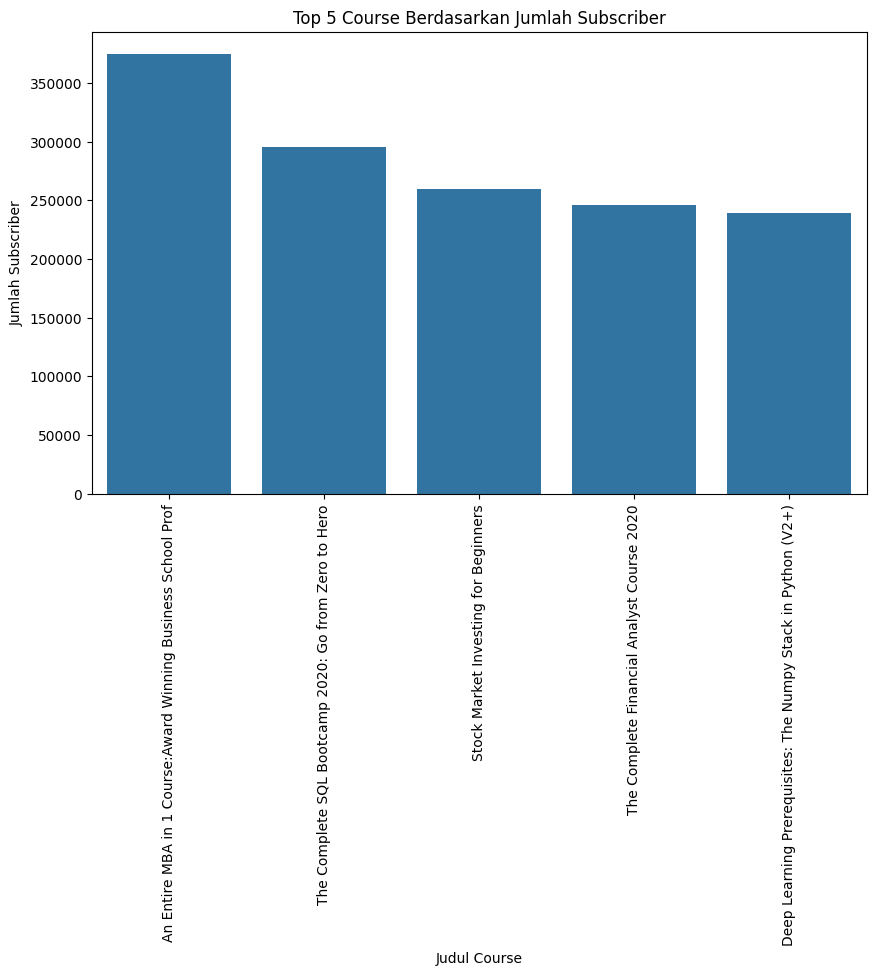

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='num_subscribers', data=top5_subscribers)
plt.title('Top 5 Course Berdasarkan Jumlah Subscriber')
plt.xlabel('Judul Course')
plt.ylabel('Jumlah Subscriber')
plt.xticks(rotation=90)
plt.show()

Berdasarkan visualisasi diatas, didapatkan bahwa course terbanyak berdasarkan jumlah subscribernya adalah course dengan judul "An Entire MBA in 1 Course:Award Winning Busineness School Prof".

**Top 5 dan Bot 5 Course berdasarkan harga tertinggi**

In [18]:
top5_amount = df.sort_values(by='price_detail__amount', ascending=False).head(5)
print("Top 5 Course")
print(top5_amount[['title', 'price_detail__amount']])

print("==="*20)

bot5_amount = df.sort_values(by='price_detail__amount', ascending=True).head(5)
print("Bottom 5 Course")
print(bot5_amount[['title', 'price_detail__amount']])


Top 5 Course
                                                   title  price_detail__amount
11850  Simpel investieren für Finanzanfänger und Priv...               12800.0
5276   Business Blogging & Social Media PressRoom (Wo...               12800.0
8490   Asta Powerproject for Building Information Mod...               12800.0
142    Speak Like a Pro: Public Speaking for Professi...               12800.0
9989   Securities Industry Essentials (SIE) Test Prep...               12800.0
Bottom 5 Course
                                                   title  price_detail__amount
13359                               株式投資テクニカル入門「超初心者コース」                1280.0
13360                   Controla tus finanzas personales                1280.0
13363                  Gastos en tus Finanzas Personales                1280.0
13365  Apri la tua Partita IVA! Il Fisco spiegato in ...                1280.0
13366     Der ETF-Meisterkurs / Geld mit ETF´s verdienen                1280.0


In [19]:
def plot_bar_chart(data, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='title', y='price_detail__amount', data=data)
    plt.title(f'{title} Course Berdasarkan Harga')
    plt.xlabel('Judul Course')
    plt.ylabel('Harga')
    plt.xticks(rotation=90)
    plt.show()

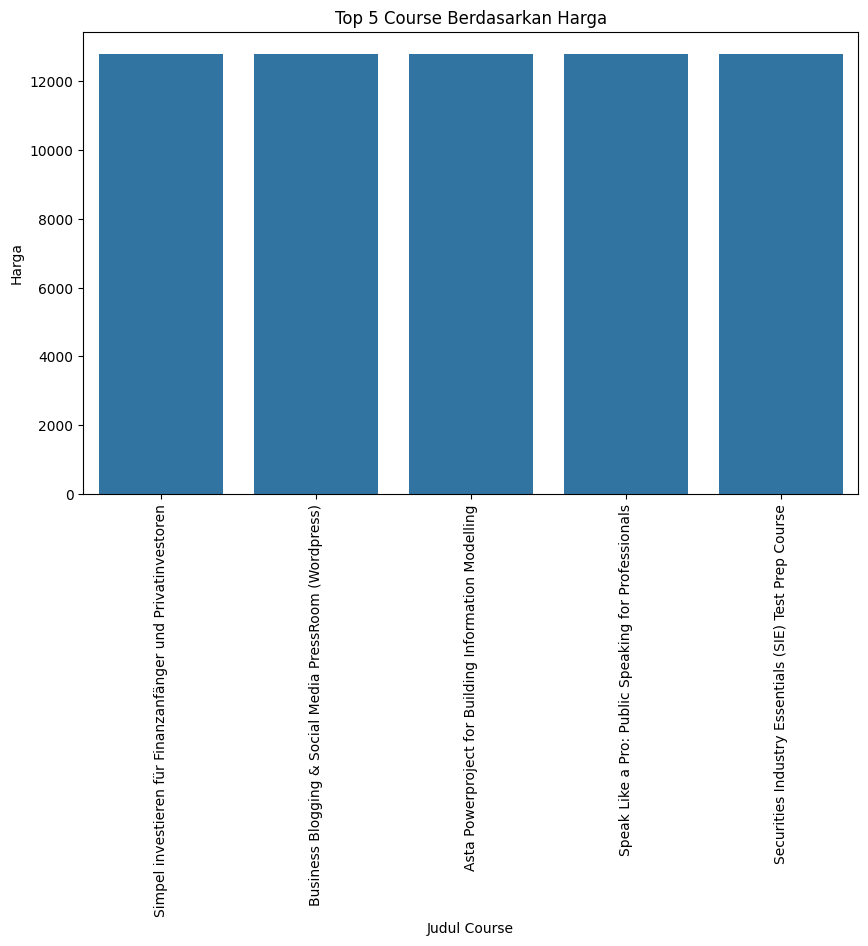

In [20]:
plot_bar_chart(top5_amount, "Top 5")

Berdasarkan visualisasi diatas, tampak bahwa course dengan harga tertinggi berada pada course dngan judul "Simpel investieren für Finanzanfänger und Priv..." dan course dengan jumlah harga 12.800 lainnya.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26666 (\N{CJK UNIFIED IDEOGRAPH-682A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

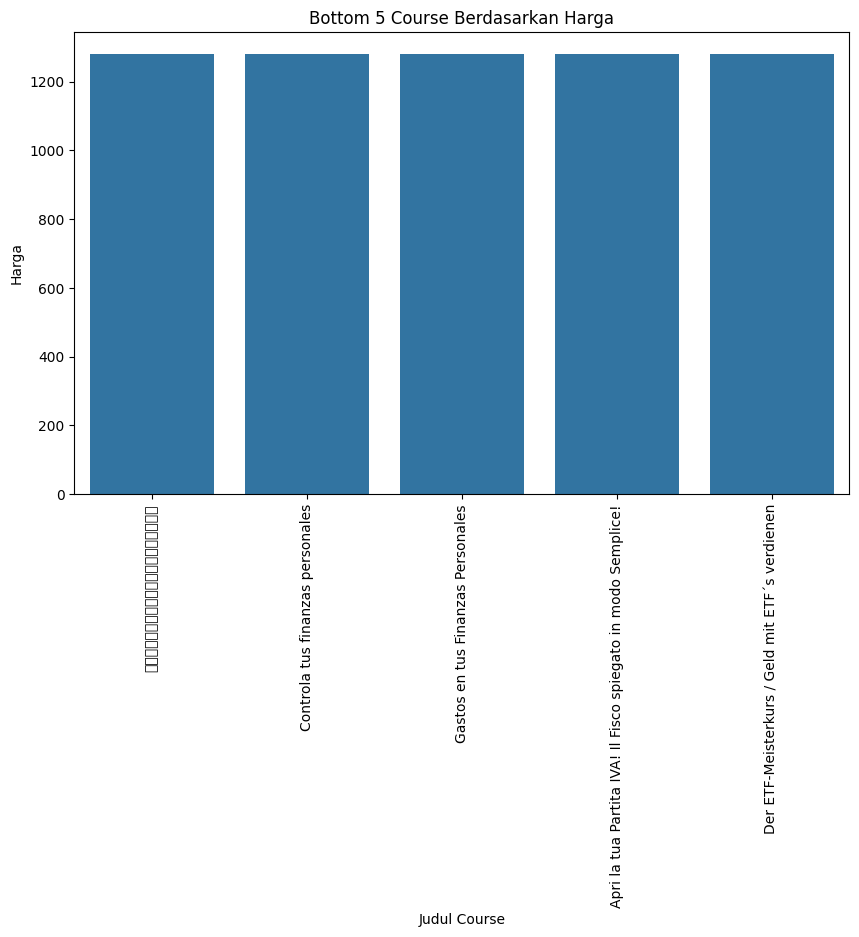

In [21]:
plot_bar_chart(bot5_amount, "Bottom 5")

Sedangkan course dengan harga terendah, dalah course dengan harga 1280. Contohnya seperti " 株式投資テクニカル入門「超初心者コース"

**Course dengan review terbanyak**

In [22]:
top5_review = df.sort_values(by='num_reviews', ascending=False).head(5)
top5_review[['title', 'num_reviews']]

,title,num_reviews
0,The Complete SQL Bootcamp 2020: Go from Zero t...,78006
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,54581
2,PMP Exam Prep Seminar - PMBOK Guide 6,52653
3,The Complete Financial Analyst Course 2020,46447
4,An Entire MBA in 1 Course:Award Winning Busine...,41630


([0, 1, 2, 3, 4],
 [Text(0, 0, 'The Complete SQL Bootcamp 2020: Go from Zero to Hero'),
  Text(1, 0, 'Tableau 2020 A-Z: Hands-On Tableau Training for Data Science'),
  Text(2, 0, 'PMP Exam Prep Seminar -  PMBOK Guide 6'),
  Text(3, 0, 'The Complete Financial Analyst Course 2020'),
  Text(4, 0, 'An Entire MBA in 1 Course:Award Winning Business School Prof')])

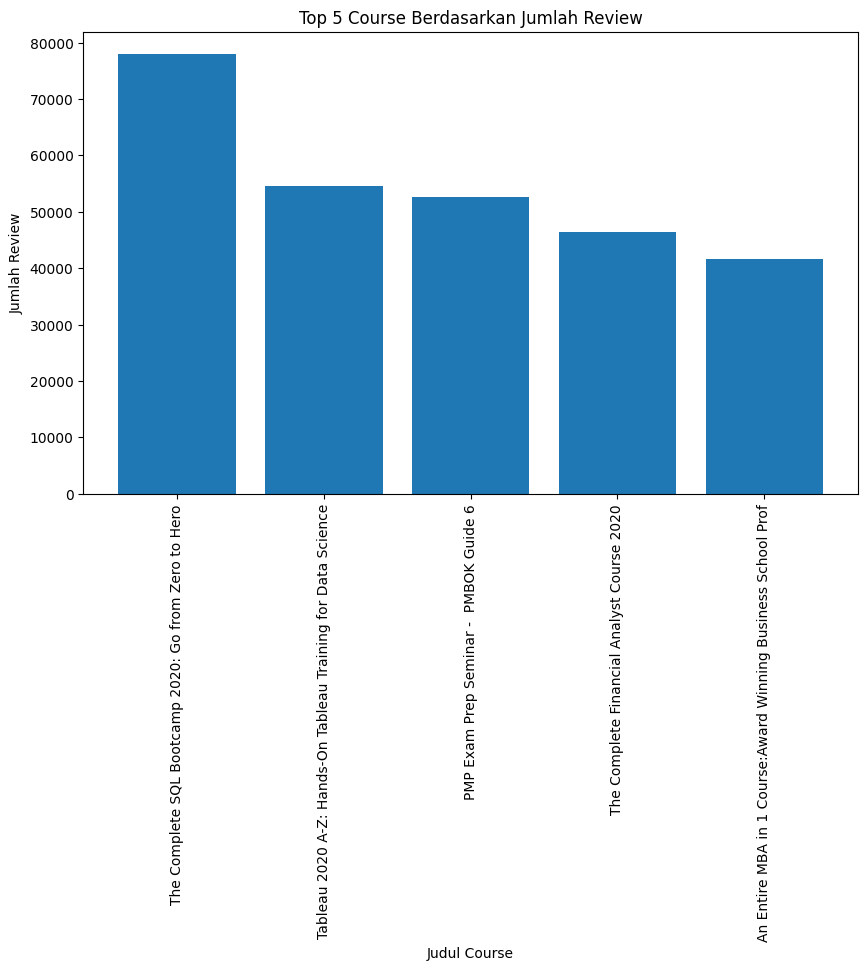

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(top5_review['title'], top5_review['num_reviews'])
plt.title('Top 5 Course Berdasarkan Jumlah Review')
plt.xlabel('Judul Course')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=90)

Course dengan jumlah review terbanyak ditempati oleh course dengan judul 	The Complete SQL Bootcamp 2020: Go from Zero t..." dengan total reivew sebesar 78006.

# Data Preparation

## Pembersihan Data

**Menangani Missing Value**

In [24]:
df.isnull().sum()

,0
id,0
title,0
url,0
is_paid,0
num_subscribers,0
avg_rating,0
avg_rating_recent,0
rating,0
num_reviews,0
is_wishlisted,0


In [25]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

,0
id,0
title,0
url,0
is_paid,0
num_subscribers,0
avg_rating,0
avg_rating_recent,0
rating,0
num_reviews,0
is_wishlisted,0


Pada tahap ini kita akan melakukan penghilangan nilai kosong, penghilangan nilai kolong ini dilakukan dengan cara menghapus Baris yang memiliki nlai kosong tersebut, hal ini dilakukan karena jumlah data yang cukup banyak dan tidak akan mempengaruhi proses selanjutnya jika dilakukan penghapusan pada data.

**Pembersihan pada kolom rating**

In [26]:
df_cleaned['rating'].value_counts()

,count
rating,
0.00000,563
5.00000,273
4.00000,58
3.00000,45
3.50000,40
...,...
4.31781,1
3.98656,1
3.64913,1


Data yang memiliki rating 0 dapat dikatakan bahwa course belum pernah dilakukan pembelian, Maka dari itu kita akan mengambil nilai rating yang >=1.

In [27]:
df_cleaned = df_cleaned[df_cleaned['rating'] >= 1]

In [28]:
df_cleaned['rating'].value_counts()

,count
rating,
5.00000,273
4.00000,58
3.00000,45
3.50000,40
4.50000,38
...,...
3.23317,1
4.31781,1
3.98656,1


Sekarang terlihat bahwa Course saat ini memiliki rating 1 - 5. Dalam artian course yang akan digunakan ini adalah course yang sudah pernah dilakukan pembelian sebelumnya.

## Feature Engineering

Pembuatan kolom bahasa ini dilakukan untuk nantinya melakukan filtering terhadap course yang akan digunakan, dengan kata lain. Course yang digunakan adalah course yang berbahasa inggris.


Pembuatan kolom bahasa ini memanfaatkan library langdetect untuk mendeteksi bahasa pada fitur title nantinya.

In [29]:
# Buat fungsi untuk deteksi bahasa
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "error"

# Tambahkan kolom baru berisi hasil deteksi bahasa
df_cleaned['language'] = df_cleaned['title'].apply(detect_language)

# Tampilkan judul yang bukan bahasa Inggris (kode 'en')
non_english_titles = df_cleaned[df_cleaned['language'] != 'en']

# Tampilkan beberapa contohnya
print(non_english_titles[['title', 'language']].head(10))

                                                title language
2              PMP Exam Prep Seminar -  PMBOK Guide 6       ca
7   Beginner to Pro in Excel: Financial Modeling a...       it
11                     Business Analysis Fundamentals       de
24  Beginning Project Management: Project Manageme...       nl
29         Sales Training: Practical Sales Techniques       fr
34  Email Etiquette: Write More Effective Emails A...       fr
45                               Six Sigma White Belt       de
70               Data Analysis Essentials Using Excel       ca
72                     Better Business Writing Skills       no
78                             Product Management 101       fr


## Seleksi Fitur

Pada bagian ini kita akan melakukan seleksi fitur yang digunakan. Pemilihan fitur didasarkan pada konsep Content-Based Filtering, di mana rekomendasi diberikan berdasarkan kemiripan konten atau atribut dari item (dalam hal ini, kursus), bukan berdasarkan perilaku pengguna lain.


Fitur yang dipilih yaitu:

- id – untuk identifikasi unik setiap kursus.

- title – merepresentasikan konten utama dari kursus dalam bentuk teks, yang digunakan untuk menghitung kemiripan antar kursus menggunakan metode seperti TF-IDF.

- rating – sebagai indikator kualitas berdasarkan penilaian pengguna, digunakan untuk memberikan bobot tambahan dalam sistem hybrid atau analisis preferensi.

- price_detail__amount – sebagai representasi nilai ekonomi kursus, dapat digunakan untuk menyesuaikan rekomendasi berdasarkan harga yang relevan dengan pengguna.

- language - sebagai filtering pada data yang menggunakan bahasa inggris

In [30]:
df_col = [
    'id',
    'title',
    'rating',
    'price_detail__amount',
    'language'
]

df_new = df_cleaned[df_col]
df_new

,id,title,rating,price_detail__amount,language
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,4.67874,8640.0,en
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,4.60015,8640.0,en
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,4.59326,8640.0,ca
3,648826,The Complete Financial Analyst Course 2020,4.53772,8640.0,en
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,4.47173,8640.0,en
...,...,...,...,...,...
13128,2675396,Finanças Empresariais I,3.50000,8640.0,pt
13129,2710904,تعليم الفوركس - تعلم البرايس اكشن وموجات ولفي,3.00000,8640.0,ar
13131,2864216,Bagaimana Cara Melakukan Penelitian Akuntansi ...,5.00000,2560.0,id
13281,3338642,Planejamento Financeiro com Ferramentas Práticas,4.50000,2560.0,pt


## Filter Data Berdasarkan Bahasa

Selanjutnya kita akan melakukan filter terhadap data yang sudah dipilih berdasarkan fitur Bahasa. Dimana hal ini dilakukan aagar kita berfokus pada course yang menggunakan bahasa inggris.

In [31]:
df_new = df_new[df_new['language']=='en']

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9761 entries, 0 to 13127
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9761 non-null   int64  
 1   title                 9761 non-null   object 
 2   rating                9761 non-null   float64
 3   price_detail__amount  9761 non-null   float64
 4   language              9761 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 457.5+ KB


Tampak bahwa data yang bersih dan siap digunakan saat ini berjumlah 9761  baris dan 5 kolom. Namun perlu diketahui untuk kolom language nantinya tidak akan digunakan. Karena kolom tersebut hanya digunakan untuk melakukan filtering di tahap sebelumnya.

## Bersihkan judul dari spasi/tanda baca

Tahap ini dilakukan pembersihan sepasi dan tanda baca pada fitur title, dilakukan agar mengurangi kesalahan pada proses rekomendasi sebelum masuk ke tahap TFIDF

In [33]:
df_new['title'] = df_new['title'].str.strip().str.lower()

<ipython-input-33-0a87dd0e3afa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['title'] = df_new['title'].str.strip().str.lower()


## TF-IDF

Sebelum membangun sistem rekomendasi berbasis konten, diperlukan transformasi data teks (judul kursus) menjadi bentuk numerik agar dapat dihitung kemiripannya. Oleh karena itu, dilakukan proses ekstraksi fitur teks menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) pada fitur title. Dalam hal ini stop_words juga digunakan untuk menghilangkan kata-kata umum dalam bahasa inggris.

In [34]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['title'])

## Standarisasi fitur numerik

Selain fitur berbasis teks, kita juga memanfaatkan fitur numerik seperti rata-rata rating (avg_rating) dan harga kursus (price_detail__amount) untuk meningkatkan kualitas rekomendasi. Namun, karena skala nilai dari masing-masing fitur bisa sangat berbeda (misalnya, rating berkisar antara 0–5, sedangkan harga bisa mencapai ratusan dolar), maka perlu dilakukan proses normalisasi agar kedua fitur memiliki skala yang sebanding.

Pada tahap ini digunakan metode Min-Max Scaling untuk mengubah nilai dari setiap fitur ke dalam rentang 0 hingga 1. Tujuannya adalah agar tidak ada fitur yang mendominasi hasil perhitungan karena perbedaan skala yang besar.

In [35]:
scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(df_new[['rating','price_detail__amount']])

## Gabungkan Fitur hasil TF-IDF dengan Fitur Numerik

Penggabungan ini dilakukan karena kita menerapkan pendekatan Content-Based Filtering berbasis hybrid, di mana sistem rekomendasi tidak hanya mempertimbangkan kemiripan dari judul kursus, tetapi juga memperhitungkan aspek kuantitatif seperti rating dan harga kursus.

Agar data numerik bisa digabungkan dengan data TF-IDF (berbentuk sparse matrix), maka fitur numerik yang telah dinormalisasi terlebih dahulu diubah menjadi sparse matrix menggunakan csr_matrix. Kemudian, kita gabungkan kedua matrix menggunakan fungsi hstack() dari SciPy.

In [36]:
numerical_sparse = csr_matrix(numerical_features)

# Gabungkan
hybrid_matrix = hstack([tfidf_matrix, numerical_sparse])

# Modeling and Results

## Pendekatan 1 : Hybrid Filtering

**Hybrid Filtering (Content-Based + Rating Weighting)**

Menggabungkan content-based filtering dengan bobot tambahan dari kolom rating dan price_detail__amount. Dalam pendekatan ini, hasil dari cosine similarity dimodifikasi agar mempertimbangkan rating dan harga.

Kelebihan :
- Menghasilkan rekomendasi yang tidak hanya mirip secara konten, tetapi juga berkualitas tinggi (rating).

- Dapat disesuaikan dengan preferensi pengguna (misal: harga murah atau rating tinggi).

- Lebih informatif dalam pengambilan keputusan.

Kekurangan :
- Lebih kompleks dalam implementasi.

- Perlu normalisasi data numerik agar bobot adil.

- Tidak cocok jika sebagian besar data rating atau price kosong.

### Cosine Similirity

Langkah selanjutnya adalah menghitung kemiripan antar kursus menggunakan Cosine Similarity.

In [37]:
cosine_sim = cosine_similarity(hybrid_matrix, hybrid_matrix)

In [38]:
cosine_sim

array([[1.        , 0.60443059, 0.66497103, ..., 0.48089319, 0.54240486,
        0.42310228],
       [0.60443059, 1.        , 0.61063386, ..., 0.47554492, 0.53785525,
        0.4671854 ],
       [0.66497103, 0.61063386, 1.        , ..., 0.51530777, 0.53414984,
        0.41247362],
       ...,
       [0.48089319, 0.47554492, 0.51530777, ..., 1.        , 0.51236503,
        0.49566257],
       [0.54240486, 0.53785525, 0.53414984, ..., 0.51236503, 1.        ,
        0.47766515],
       [0.42310228, 0.4671854 , 0.41247362, ..., 0.49566257, 0.47766515,
        1.        ]])

Nilai hasil cosine similarity berada di antara 0 dan 1, di mana nilai 1 berarti sangat mirip dan 0 berarti tidak mirip sama sekali.

In [39]:
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=df_new['title'],
    columns=df_new['title']
)
print('Shape:', cosine_sim_df.shape)

Shape: (9761, 9761)


In [40]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

title,learn to trade using technical analysis,qpon bootcamp - extreme couponing for beginners!,diagnosis evolution: the icd-9 to icd-10 transition,the business of video and photography,create and launch your podcast website with wordpress
title,,,,,
3 low cost business tips by america's #1 wine brand founders,0.364522,0.304973,0.393339,0.397099,0.411656
modeling workflow patterns in tibco business studio,0.339454,0.305845,0.349135,0.337112,0.380987
minutes of a meeting basic intro course,0.297514,0.268057,0.305999,0.269197,0.333915
"learn the basics about saving, investing & managing credit",0.461575,0.354971,0.411229,0.365292,0.446408
amazon affiliate marketing using authority site (beginners),0.444978,0.303001,0.427493,0.453012,0.415412
government contracting for everyone,0.405698,0.317435,0.455034,0.454552,0.460531
"how to read p&id, pfd & bfd used in process plant like pro",0.400283,0.295660,0.462732,0.480380,0.456278
digital strategy & transformation for business executives,0.359496,0.323902,0.369749,0.361443,0.403481
the secret of a successful strategy,0.211321,0.190398,0.217348,0.191208,0.237177


Dataframe diatas adalah salah satu matriks kesamaan antar course. Semakin mendekati angka 1 maka course dapat dikatakan memiliki kesamaan yang tinggi. Sebagai contoh, Course "how i used networking to triple my business in 6 months" memiliki kesamaan 54% dengan "drop shipping 2.0 (more traffic & less competition)"

### Mendapatkan Rekomendasi

Berikut ini adalah fungsi untuk mendapatkan rekomendasi berdasarkan judul course.

In [41]:
def rekomendasi_kursus(title, cosine_sim_df, top_n=5):
    title = title.strip().lower()
    if title not in cosine_sim_df.index:
        print(f"Judul '{title}' tidak ditemukan.")
        return []

    scores = cosine_sim_df.loc[title].sort_values(ascending=False)[1:top_n+1]
    return list(zip(scores.index, scores.values))

In [42]:
judul = "hands-on hadoop masterclass - tame the big data!"
hasil = rekomendasi_kursus(judul, cosine_sim_df, top_n=5)

print(f"Rekomendasi untuk '{judul}':\n")
for i, (judul_rekom, skor) in enumerate(hasil, 1):
    print(f"{i}. {judul_rekom} | Similarity: {skor:.4f}")

Rekomendasi untuk 'hands-on hadoop masterclass - tame the big data!':

1. the ultimate hands-on hadoop - tame your big data! | Similarity: 0.9362
2. big data and hadoop for beginners - with hands-on! | Similarity: 0.8550
3. taming big data with mapreduce and hadoop - hands on! | Similarity: 0.7175
4. hands-on pyspark for big data analysis | Similarity: 0.7009
5. business analytics with big data : a complete guide | Similarity: 0.6460


Tampak bahwa pada percobaan diatas, ketika dimasukan judul sebuah course, didapatkan 5 rekomendasi dari yang tertinggi.

Input : "Big Data and Hadoop for Beginners - with Hands-on!"

Rekomendasi tertinggi : "The Ultimate Hands-On Hadoop - Tame your Big Data!"

dengan kesamaan 93%

## Pendekatan Umum (Cosine + TFIDF)

**Content-Based Filtering (TF-IDF + Cosine Similarity)**

Pendekatan ini menggunakan judul kursus (title) untuk menghitung kemiripan antar kursus berdasarkan teks menggunakan TF-IDF dan cosine similarity. Rekomendasi diberikan berdasarkan kemiripan konten.

Kelebihan:
- Tidak memerlukan data pengguna.

- Bisa merekomendasikan kursus baru selama judul tersedia.

- Relevan secara tematik karena berbasis konten.

Kekurangan:
- Tidak mempertimbangkan rating atau popularitas kursus.

- Kemiripan terbatas hanya pada teks, bisa menimbulkan bias jika judul kursus ambigu atau terlalu umum.

- Tidak bisa mengenali kursus yang bagus tapi dengan judul yang berbeda secara semantik.



In [43]:
tfidf_matrix_2 = tfidf.fit_transform(df_new['title'])

tfidf_matrix_2.shape

(9761, 5737)

In [44]:
tfidf_matrix_2.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
cosine_sim_2 = cosine_similarity(tfidf_matrix_2)
cosine_sim_2

array([[1.        , 0.07272131, 0.21965195, ..., 0.        , 0.        ,
        0.        ],
       [0.07272131, 1.        , 0.09959218, ..., 0.        , 0.        ,
        0.10775604],
       [0.21965195, 0.09959218, 1.        , ..., 0.09540136, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.09540136, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.10775604, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
cosine_sim_df_2 = pd.DataFrame(
    cosine_sim_2,
    index=df_new['title'],
    columns=df_new['title']
)
print('Shape:', cosine_sim_df_2.shape)

Shape: (9761, 9761)


In [47]:
cosine_sim_df_2.sample(5, axis=1).sample(10, axis=0)

title,become a great presenter and increase your influence,the project management course: beginner to project manager,protect your creative works with us copyright registration,beginners guide to creating your own wordpress web shop,introduction to the actuarial exams
title,,,,,
investing 101: asset classes,0.000000,0.000000,0.0,0.000000,0.0
how to overcome the fear of starting your own business,0.000000,0.000000,0.0,0.000000,0.0
primavera p6: oracle primavera project scheduling training,0.000000,0.148322,0.0,0.000000,0.0
from complete beginner to consistent forex professional.,0.000000,0.165524,0.0,0.000000,0.0
use linkedin to find investors,0.000000,0.000000,0.0,0.000000,0.0
dropshipping basics: the beginner's guide to amazon fba,0.000000,0.160361,0.0,0.085962,0.0
compare project management software 2019,0.000000,0.308269,0.0,0.000000,0.0
start and run a successful consulting business,0.000000,0.000000,0.0,0.000000,0.0
consulting fees guide: how to increase your consulting fees,0.118754,0.000000,0.0,0.044514,0.0


Dengan menggunakan pendekatan yang sama seperti sebelumnya namun dengan fitur yang berbeda, terlihat bahwa nilai cosine similarity yang dihasilkan cenderung rendah dan mendekati nol. Hal ini menunjukkan bahwa tingkat kemiripan antar data sulit dibedakan, sehingga menghasilkan rekomendasi yang kurang akurat atau tidak relevan.

In [48]:
judul = "Big Data and Hadoop for Beginners - with Hands-on!"
rekomendasi_kursus(judul, cosine_sim_df_2)

[('hands-on hadoop masterclass - tame the big data!',
  np.float64(0.7474471550412047)),
 ('the ultimate hands-on hadoop - tame your big data!',
  np.float64(0.7438557334573)),
 ('taming big data with mapreduce and hadoop - hands on!',
  np.float64(0.6715521429058737)),
 ('hands-on pyspark for big data analysis', np.float64(0.5421546337539548)),
 ('fundamentals of data analysis for big data',
  np.float64(0.46915882287592925))]

Tampak bahwa pada percobaan diatas, ketika dimasukan judul sebuah course, didapatkan 5 rekomendasi dari yang tertinggi.

Input : "Big Data and Hadoop for Beginners - with Hands-on!"

Rekomendasi tertinggi : "hands-on hadoop masterclass - tame the big data!"

dengan kesamaan 74%

# Evaluasi

Pada tahap ini akan dilakukan evaluasi terhadap Kedua Pendekatan tersebut. Kita akan menggunakan rating sebagai proxy relevansi, dmna :
1. Kursus dianggap relevan jika rating >= 4.0

2. Kursus dianggap tidak relevan jika rating < 4.0


Langkah-Langkah :
1. Ambil rekomendasi dari fungsi yang sudha dibuat sebelumnya.
2. Tentukan relevansi dari hasil rekomendasi berdasarkan rating.
3. Hitung matrik evaluasi : Precision, Recall, F1, NDCG

In [49]:
def evaluasi_rekomendasi(judul_input, df, similarity_df, k=5, rating_threshold=4.0):
    judul_input = judul_input.strip().lower()
    rekomendasi_with_score = rekomendasi_kursus(judul_input, similarity_df, top_n=k)
    rekomendasi = [judul for judul, _ in rekomendasi_with_score]

    # Ambil rating dari judul yang direkomendasikan
    rekomendasi_rating = df[df['title'].isin(rekomendasi)]['rating']
    relevansi = [1 if r >= rating_threshold else 0 for r in rekomendasi_rating]

    precision = sum(relevansi) / k
    total_relevan_aktual = df[df['rating'] >= rating_threshold]
    recall = sum(relevansi) / len(total_relevan_aktual) if len(total_relevan_aktual) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    def ndcg_at_k(relevansi, k):
        relevansi = np.array(relevansi)[:k]
        dcg = np.sum((2 ** relevansi - 1) / np.log2(np.arange(2, relevansi.size + 2)))
        ideal_relevansi = np.sort(relevansi)[::-1]
        idcg = np.sum((2 ** ideal_relevansi - 1) / np.log2(np.arange(2, ideal_relevansi.size + 2)))
        return dcg / idcg if idcg > 0 else 0.0

    ndcg = ndcg_at_k(relevansi, k)

    return {
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1': round(f1, 3),
        'NDCG': round(ndcg, 3),
        'Relevansi': relevansi,
        'Rekomendasi': rekomendasi_with_score
    }


## Hybrid

In [50]:
judul = "hands-on hadoop masterclass - tame the big data!"
hasil = evaluasi_rekomendasi(judul, df_new, cosine_sim_df, k=5)

print("Evaluasi Rekomendasi:")
for key, value in hasil.items():
    if key not in ['Relevansi', 'Rekomendasi']:
        print(f"{key}: {value}")
print("\nRekomendasi Judul:", hasil['Rekomendasi'])
print("Relevansi:", hasil['Relevansi'])


Evaluasi Rekomendasi:
Precision: 0.8
Recall: 0.001
F1: 0.001
NDCG: 0.983

Rekomendasi Judul: [('the ultimate hands-on hadoop - tame your big data!', np.float64(0.9361723027885043)), ('big data and hadoop for beginners - with hands-on!', np.float64(0.8549947892181561)), ('taming big data with mapreduce and hadoop - hands on!', np.float64(0.7175205419414169)), ('hands-on pyspark for big data analysis', np.float64(0.7009208372332177)), ('business analytics with big data : a complete guide', np.float64(0.6459518116729288))]
Relevansi: [1, 1, 1, 0, 1]


Berdasarkan hasil rekomendasi, dapat dijelaskan sebagai berikut :
- Precision 0.8 = Dari 5 rekomendasi yang diberikan, 80% (yaitu 4 dari 5) memiliki rating tinggi (≥ 4.0).
- Recall: 0.001 = Dari seluruh kursus dengan rating ≥ 4.0 di dataset (df_new), hanya 0.1% yang berhasil direkomendasikan.
- F1-score: 0.001 = Skor gabungan antara precision dan recall juga rendah karena recall-nya sangat rendah, meskipun precision-nya bagus.
- NDCG (Normalized Discounted Cumulative Gain): 0.983 = Urutan rekomendasi sangat baik. Judul-judul yang relevan (bernilai tinggi) muncul di urutan atas daftar rekomendasi.


Relevansi: [1, 1, 1, 0, 1]

Empat dari lima rekomendasi (baris ke-0, 1, 2, dan 4) punya rating ≥ 4.0, ditandai dengan angka 1 pada Relevansi.

Hanya satu yang tidak relevan (0 → baris ke-3: "hands-on pyspark...").


## Umum

In [51]:
judul = "hands-on hadoop masterclass - tame the big data!"
hasil = evaluasi_rekomendasi(judul, df_new, cosine_sim_df_2, k=5)

print("Evaluasi Rekomendasi:")
for key, value in hasil.items():
    if key not in ['Relevansi', 'Rekomendasi']:
        print(f"{key}: {value}")
print("\nRekomendasi Judul:", hasil['Rekomendasi'])
print("Relevansi:", hasil['Relevansi'])


Evaluasi Rekomendasi:
Precision: 1.0
Recall: 0.001
F1: 0.002
NDCG: 1.0

Rekomendasi Judul: [('the ultimate hands-on hadoop - tame your big data!', np.float64(0.914517930895829)), ('big data and hadoop for beginners - with hands-on!', np.float64(0.7474471550412047)), ('taming big data with mapreduce and hadoop - hands on!', np.float64(0.562262586918968)), ('hands-on pyspark for big data analysis', np.float64(0.4539234519683907)), ('fundamentals of data analysis for big data', np.float64(0.3928071054685791))]
Relevansi: [1, 1, 1, 1, 1]


Berdasarkan hasil rekomendasi, dapat dijelaskan sebagai berikut :
- Precision 1 = Dari 5 rekomendasi yang diberikan, 100% (yaitu 5 dari 5) memiliki rating tinggi (≥ 4.0).
- Recall: 0.001 = Dari seluruh kursus dengan rating ≥ 4.0 di dataset (df_new), hanya 0.1% yang berhasil direkomendasikan.
- F1-score: 0.002 = Skor gabungan antara precision dan recall juga rendah karena recall-nya sangat rendah, meskipun precision-nya bagus.
- NDCG (Normalized Discounted Cumulative Gain): 1 = Urutan rekomendasi sangat baik. Judul-judul yang relevan (bernilai tinggi) muncul di urutan atas daftar rekomendasi.


Relevansi: [1, 1, 1, 1, 1]

lima rekomendasi (baris ke-0, 1, 2, dan 4) punya rating ≥ 4.0, ditandai dengan angka 1 pada Relevansi.
